In [445]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib as mpl

%matplotlib inline
mpl.style.use('ggplot')
mpl.rcParams.update({'font.size':15})

In [2]:
df_days = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

In [301]:
df_days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [302]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<h2>Bike count vs season</h2>

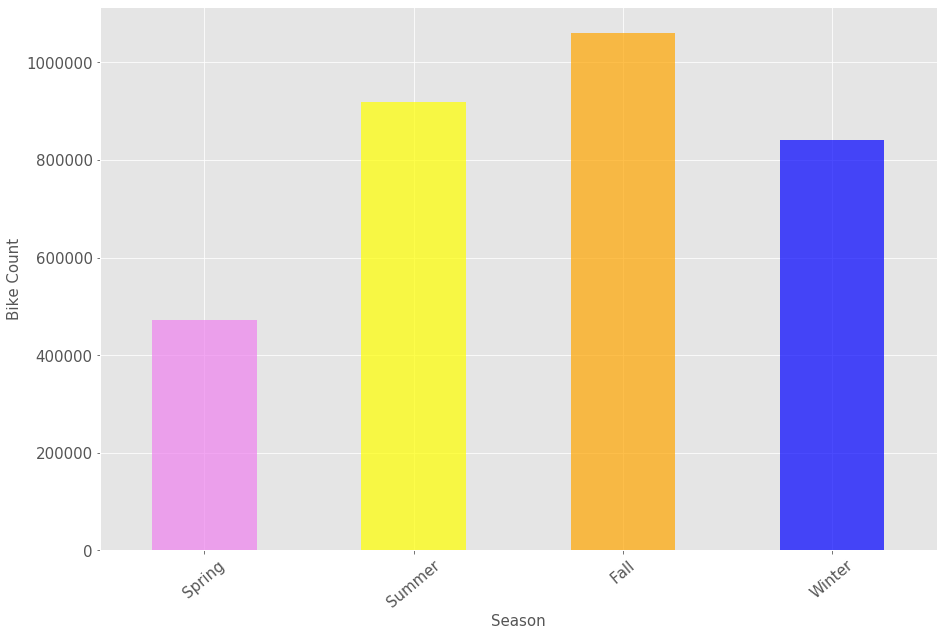

In [292]:
df_season = df_days.groupby(['season']).sum()

seasons = ['Spring', 'Summer', 'Fall', 'Winter']
colors = ['violet', 'yellow', 'orange', 'blue']
df_season['cnt'].plot(kind='bar', color=colors, figsize=(15, 10), alpha=0.7)
plt.rc('axes', titlesize=15, labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.xticks(range(0, 4), seasons, rotation=40)
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.show()

<p style='font-size: 15px'>
    As we can infer from the chart that there were four seasons considered in the dataset, namely, spring, summer, fall and winter among which "Fall" was the season during which the bike count was the most followed by summer, winter and spring. This may be due to the reason that people are more likely to take a walk at a park or in the nature during spring and take less time to ride a bicycle or perhaps any other vehicles. On other days, due to certain weather conditions related to the seasons, people prefer taking a mode of transportation such as a bicycle in this case for their purposes. 
</p>

<h2>Bike Count vs weather situation and hour</h2>

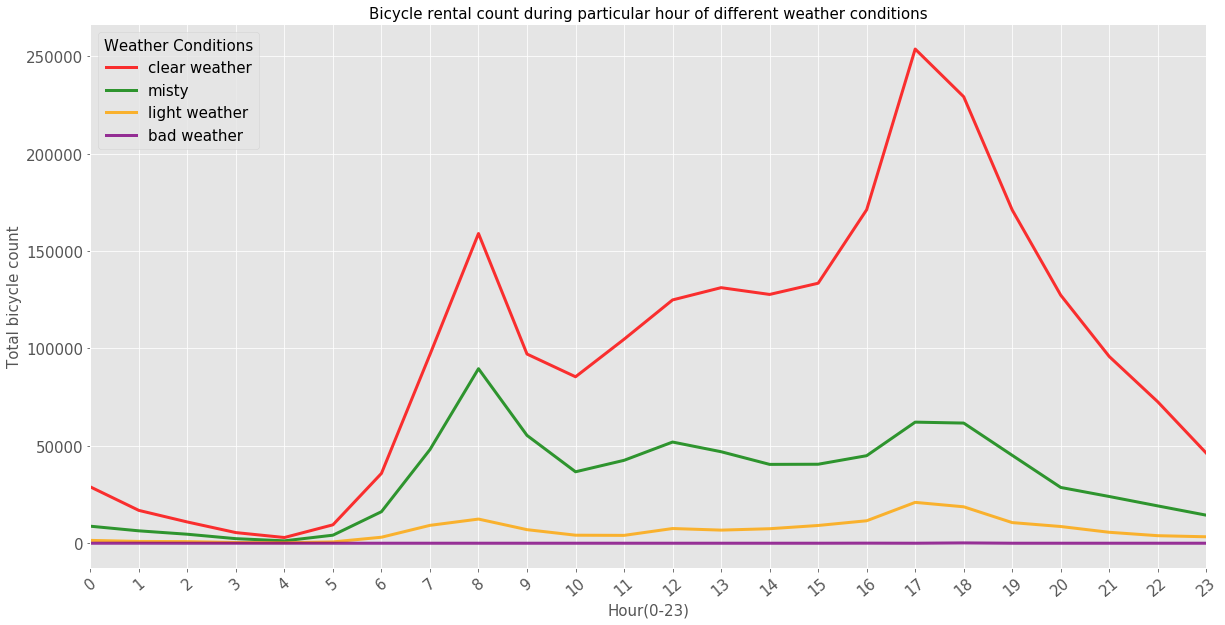

In [172]:
df_weather = df_hour.groupby(['weathersit', 'hr']).sum()

for i in df_weather.columns:
    if i != 'cnt':
        df_weather.drop(i, axis=1, inplace=True)

df_pivot = df_weather.reset_index()
df_pivot = df_pivot.pivot(index='hr', columns='weathersit', values='cnt')
df_pivot.fillna(0, inplace=True)
# df_pivot.head()

colors = ['red', 'green', 'orange', 'purple']
labels = ['clear weather', 'misty', 'light weather', 'bad weather']
df_pivot.plot(kind='line', color=colors, figsize=(20, 10), linewidth=3, alpha=0.8)
plt.legend(labels, title='Weather Conditions', loc='upper left').fancybox=True
plt.xlabel('Hour(0-23)')
plt.ylabel('Total bicycle count')
plt.title('Bicycle rental count during particular hour of different weather conditions')
plt.xticks(range(0, 24),rotation=40)
plt.show()

<p style="font-size: 15px">We may observe the above line chart which consist of 4 different weather conditions along with the hour of the day between 0 to 23 hours, against which the bicycle count has been plotted. We can infer that whenever the weather condition was clear, people were likely to rent a bicycle for their daily usage, followed by misty weather and light weather (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds). When we observe the bad weather plot(line in purple color), we can infer that people are less likely to rent bikes in conditions like heavy weather conditions(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)<br/>
    We also infer that peak bike rental timings were somewhere between <b>16:00 to 18:00 hours</b>, which is the time when working hours of offices and schools are likely to end. The peak time is followed by a subsequent time between <b>7:00 to 9:00 hours</b> which is the time when offices, schools and other work places commence.</p>

<h2>Holidays vs Bike Count</h2>

Text(0, 0.5, '')

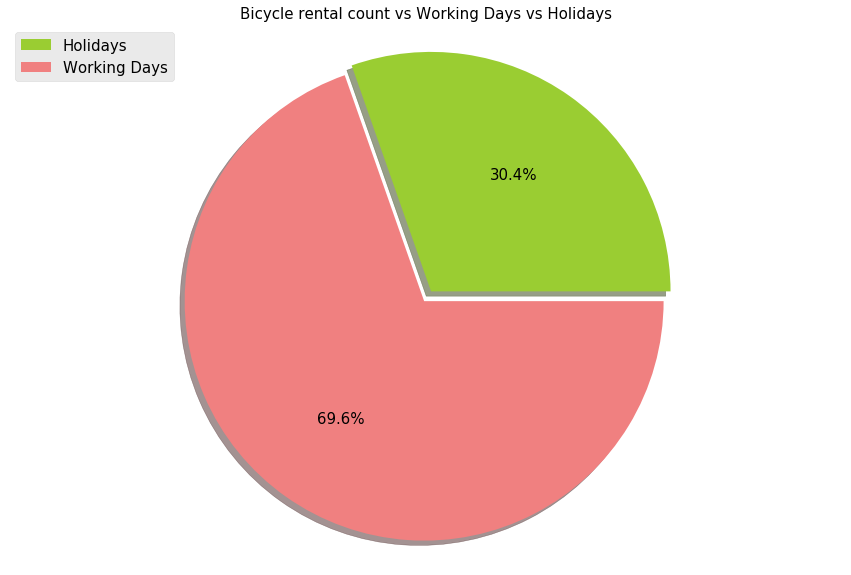

In [180]:
df_holiday = df_days.groupby(['workingday']).sum()

color_list = ['yellowgreen', 'lightcoral']
explode_list = [0, 0.05]
legend_list = ['Holidays', 'Working Days']
df_holiday['cnt'].plot(kind='pie', figsize=(15, 10), autopct='%1.1f%%', 
                       shadow=True, colors=color_list, explode=explode_list, labels=None)
plt.title('Bicycle rental count vs Working Days vs Holidays')
plt.axis('equal')
plt.legend(legend_list, loc='upper left').fancybox=True
plt.ylabel(None)

<p style='font-szie: 15px'>When we observe the above pie-chart, we infer that people are likely to rent bicycle when there are no holidays as they may have to go the offices, schools or workplaces. There are almost <b>69.6%</b> of total population who rented bicycle during workdays and just <b>30.4%</b> who rented bicycle during holidays.</p>

<h2>Season vs temp, humidity and windspeed</h2>

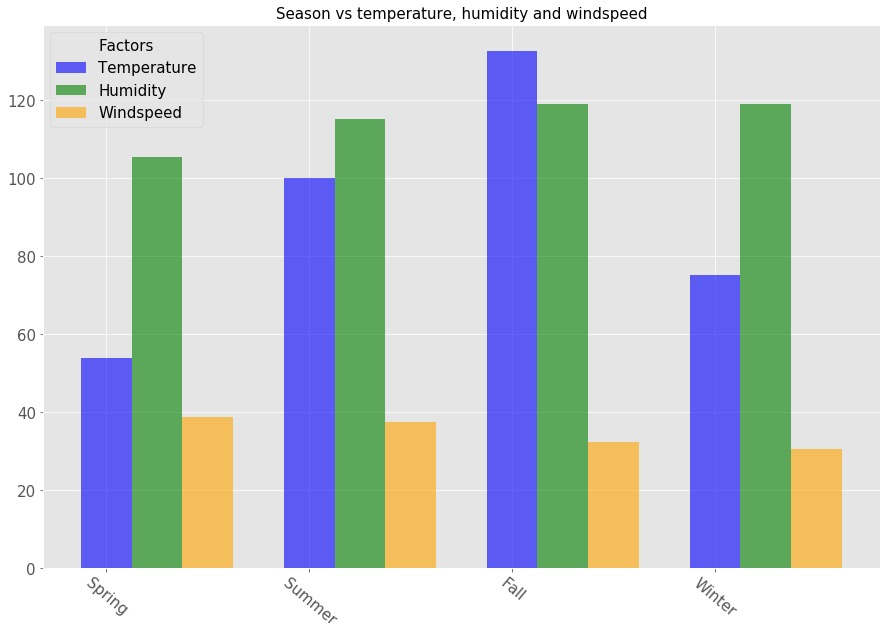

In [308]:
df_factors = df_days.groupby(['season']).sum()

fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(df_factors.index+0.00, df_factors['temp'], color='blue', width=0.25, alpha=0.6)
plt.bar(df_factors.index+0.25, df_factors['hum'], color='green', width=0.25, alpha=0.6)
plt.bar(df_factors.index+0.50, df_factors['windspeed'], color='orange', width=0.25, alpha=0.6)
plt.legend(['Temperature', 'Humidity', 'Windspeed'], loc=('upper left'), title='Factors').fancybox=True
plt.xticks([])
plt.title('Season vs temperature, humidity and windspeed')
plt.xticks(np.arange(1, 5), ['Spring', 'Summer', 'Fall', 'Winter'], rotation=-40)
plt.show()

<p style="font-size=15px">The temperature obtained is the <b>normalized temperature in Celsius</b>, the humidity is the <b>normalized humidity and the values are divided to 110(max)</b> and the windspeed is <b>normalized speed with values divided upto 67(max)</b>. <br/>
The above graph shows the difference between the temperature, humidity and windspeed in various seasons such as Spring, Summer, Fall and Winter</p>

<h2>Bike Count vs Year</h2>

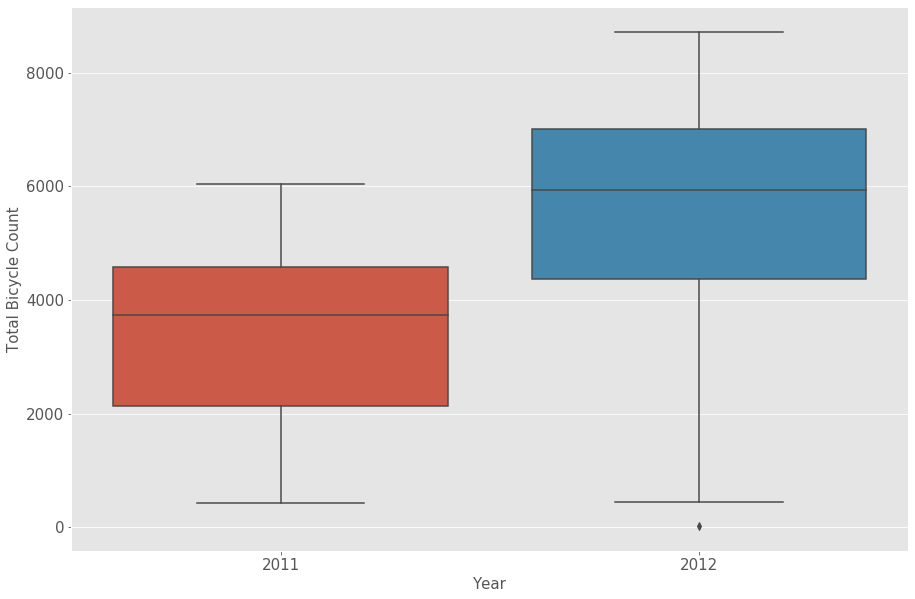

In [296]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x=df_days.yr, y=df_days.cnt)
# plt.xticks([])
plt.xticks(np.arange(0, 2), ['2011', '2012'])
plt.xlabel('Year')
plt.ylabel('Total Bicycle Count')
plt.show()

<p style='font-size=15px'>In the above box plots, we can see that in the year <b>2012</b>, bicycle rental was the highest with more than <b>8000</b> rental counts whereas in <b>2011</b>, it was low with a count approximately equal to <b>6000</b>. The <b>median</b> bike rented in 2011 was approximately <b>3800</b> while in <b>2012</b>, it was almost <b>5900</b>.</p>

<h3>Predicting our inference in the above given dataset</h3>

In [455]:
X = df_days[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'season', 'weathersit']]
y = df_days.loc[:, 'cnt']

In [407]:
# X.drop(['instant', 'dteday'], axis=1, inplace=True)


In [456]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

In [457]:
X_train_scaled = preprocessing.scale(train_X)
y_train_scaled = preprocessing.scale(train_y)
x_test_scaled = preprocessing.scale(test_X)
y_test_scaled = preprocessing.scale(test_y)

In [458]:
lin_regr = LinearRegression()
lin_regr.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [459]:
test_y_predict = lin_regr.predict(x_test_scaled)

In [460]:
print('The R squared is as follows: ',r2_score(test_y_predict, y_test_scaled))

The R squared is as follows:  0.9993453007129689


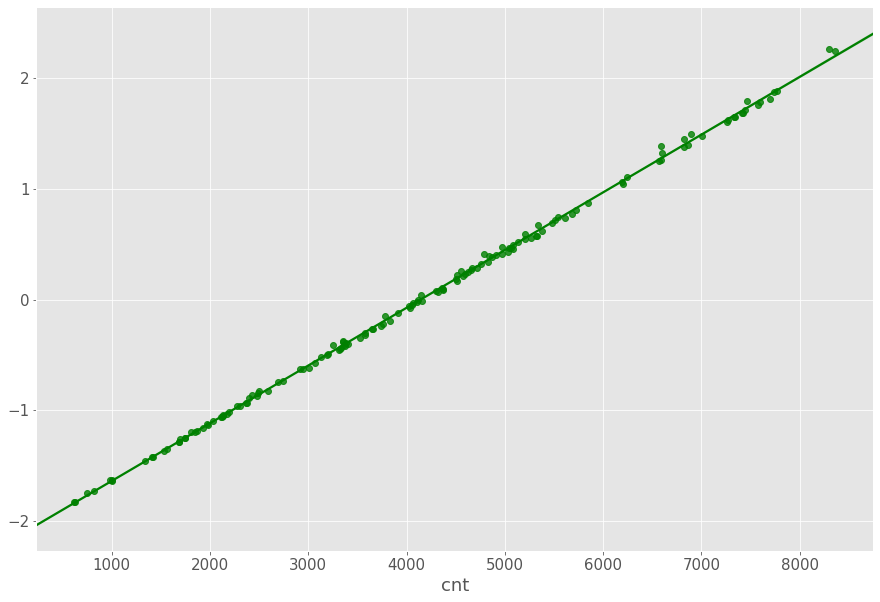

In [471]:
plt.figure(figsize=(15, 10))
sns.regplot(x=test_y, y=test_y_predict, color='green')